## Visualizing Earning Based On College Majors

A course's job outcomes can be one of the most crucial factors for both course providers and students. Students are usually looking for courses with more job demand and higher salaries. In comparison, institutions may focus on courses based on their market demand and provide future job opportunities as a motivation to attract students. Analysing the job outcomes of previously graduated students provides an overview of the market. I am working with a dataset (`recent_grads.csv`)  initially released by [American Comunity Survey](https://www.census.gov/programs-surveys/acs/) and cleaned by [FiveThirtyEight](https://github.com/fivethirtyeight/data/tree/master/college-majors). The dataset contains the job outcomes of students who graduated from college between 2010 and 2012. I will visualise the distribution and the relation of different variables to answer some question from the dataset.


- `Rank` - Rank by median earnings (the dataset is ordered by this column).
- `Major_code` - Major code.
- `Major` - Major description.
- `Major_category` - Category of major.
- `Total` - Total number of people with major.
- `Sample_size` - Sample size (unweighted) of full-time.
- `Men` - Male graduates.
- `Women` - Female graduates.
- `ShareWomen` - Women as share of total.
- `Employed` - Number employed.
- `Median` - Median salary of full-time, year-round workers.
- `Low_wage_jobs` - Number in low-wage service jobs.
- `Full_time` - Number employed 35 hours or more.
- `Part_time`- Number employed less than 35 hours.

I want to explore the following scenarios:

- Do students in more popular majors make more money?
  - Using scatter plots
- How many majors are predominantly male? Predominantly female?
  - Using histograms
- Which category of majors have the most students?
  - Using bar plots

1) whether students in more popular majors make more money? 

2) whether students with female majority subjects make more money? and 

3) any correlation between the number of full time employment and median salary?

In [1]:
# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline 

In [2]:
# Load the data file
recent_grads = pd.read_csv('recent-grads.csv')

In [3]:
# print the first 10 rows of the dataset
recent_grads.head(10)

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972
5,6,2418,NUCLEAR ENGINEERING,2573.0,2200.0,373.0,Engineering,0.144967,17,1857,...,264,1449,400,0.177226,65000,50000,102000,1142,657,244
6,7,6202,ACTUARIAL SCIENCE,3777.0,2110.0,1667.0,Business,0.441356,51,2912,...,296,2482,308,0.095652,62000,53000,72000,1768,314,259
7,8,5001,ASTRONOMY AND ASTROPHYSICS,1792.0,832.0,960.0,Physical Sciences,0.535714,10,1526,...,553,827,33,0.021167,62000,31500,109000,972,500,220
8,9,2414,MECHANICAL ENGINEERING,91227.0,80320.0,10907.0,Engineering,0.119559,1029,76442,...,13101,54639,4650,0.057342,60000,48000,70000,52844,16384,3253
9,10,2408,ELECTRICAL ENGINEERING,81527.0,65511.0,16016.0,Engineering,0.196450,631,61928,...,12695,41413,3895,0.059174,60000,45000,72000,45829,10874,3170


In [4]:
# print the header of the dataset
recent_grads_header = recent_grads.head(0)
print(recent_grads_header)

Empty DataFrame
Columns: [Rank, Major_code, Major, Total, Men, Women, Major_category, ShareWomen, Sample_size, Employed, Full_time, Part_time, Full_time_year_round, Unemployed, Unemployment_rate, Median, P25th, P75th, College_jobs, Non_college_jobs, Low_wage_jobs]
Index: []

[0 rows x 21 columns]


In [5]:
# print the first row
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                  2339.0
Men                                    2057.0
Women                                   282.0
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                    0.018381
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


In [6]:
# Summarize numerical features
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [7]:
# Number of datapoint
print(len(recent_grads))

173


In [8]:
# drop rows with missing values
raw_data_count = recent_grads.shape[0]
recent_grads.dropna(inplace=True)
cleaned_data_count = recent_grads.shape[0]
print(raw_data_count, '-->', cleaned_data_count)

173 --> 172


In [9]:
# Summarize numerical features
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.00000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000,172.000000
mean,87.377907,3895.953488,39370.081395,16723.406977,22646.674419,0.522223,357.941860,31355.80814,26165.767442,8877.232558,19798.843023,2428.412791,0.068024,40076.744186,29486.918605,51386.627907,12387.401163,13354.325581,3878.633721
std,49.983181,1679.240095,63483.491009,28122.433474,41057.330740,0.231205,619.680419,50777.42865,42957.122320,14679.038729,33229.227514,4121.730452,0.030340,11461.388773,9190.769927,14882.278650,21344.967522,23841.326605,6960.467621
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.00000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.750000,2403.750000,4549.750000,2177.500000,1778.250000,0.336026,42.000000,3734.75000,3181.000000,1013.750000,2474.750000,299.500000,0.050261,33000.000000,24000.000000,41750.000000,1744.750000,1594.000000,336.750000
50%,87.500000,3608.500000,15104.000000,5434.000000,8386.500000,0.534024,131.000000,12031.50000,10073.500000,3332.500000,7436.500000,905.000000,0.067544,36000.000000,27000.000000,47000.000000,4467.500000,4603.500000,1238.500000
75%,130.250000,5503.250000,38909.750000,14631.000000,22553.750000,0.703299,339.000000,31701.25000,25447.250000,9981.000000,17674.750000,2397.000000,0.087247,45000.000000,33250.000000,58500.000000,14595.750000,11791.750000,3496.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.00000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


In [10]:
cleaned_data_count = 172

- __Sample-size vs Median income__

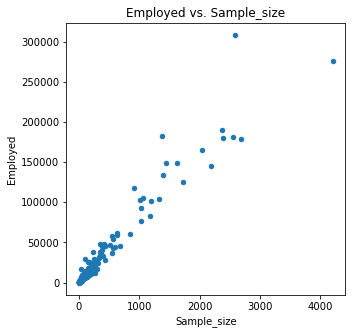

In [10]:
# Scatter plot of Sample_size vs Employment Status 
recent_grads.plot(x='Sample_size',
                  y='Employed',
                  kind = 'scatter',
                  title = 'Employed vs. Sample_size',
                  figsize = (5,5))
plt.show()

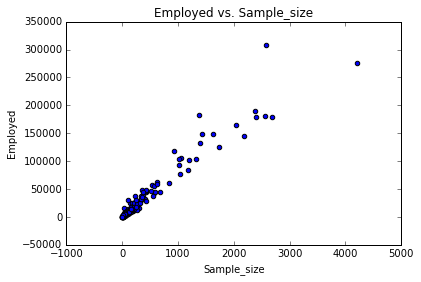

In [12]:
ax = recent_grads.plot(x = 'Sample_size', y = 'Employed', kind = 'scatter')
ax.set_title('Employed vs. Sample_size')

- __Sample_size vs Unemployment_rate__

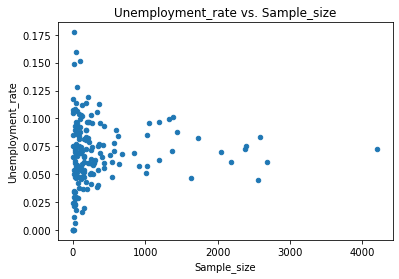

In [12]:
recent_grads.plot(x='Sample_size',
                  y='Unemployment_rate',
                  kind = 'scatter',
                  title = 'Unemployment_rate vs. Sample_size'
                 )
plt.show()

- __Full_time vs Median income__

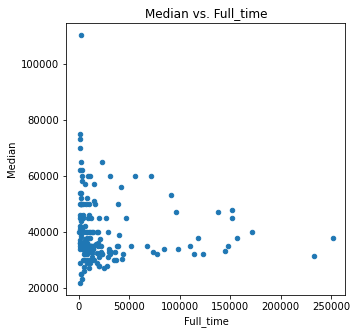

In [14]:
recent_grads.plot(x='Full_time',
                  y='Median',
                  kind = 'scatter',
                  title = 'Median vs. Full_time',
                  figsize = (5,5)
                 )
plt.show()

- __ShareWomen vs Unemployment_rate__

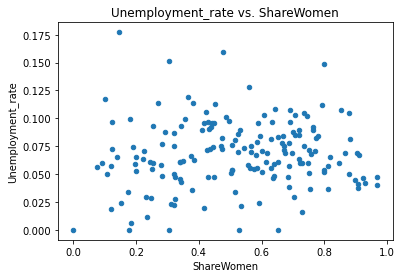

In [13]:
recent_grads.plot(x='ShareWomen',
                  y='Unemployment_rate',
                  kind = 'scatter',
                  title = 'Unemployment_rate vs. ShareWomen'
                 )
plt.show()

- __Men vs Median income__

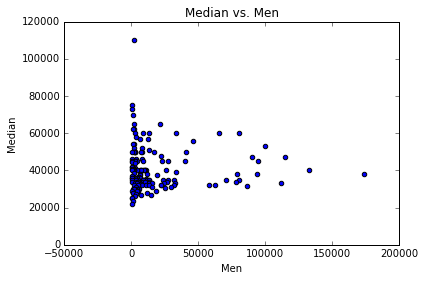

In [16]:
recent_grads.plot(x='Men', y='Median', kind = 'scatter', title = 'Median vs. Men')

- __Women vs Median income__

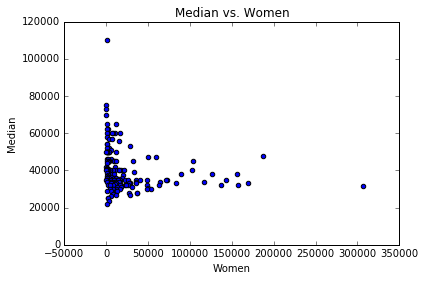

In [17]:
recent_grads.plot(x='Women', y='Median', kind = 'scatter', title = 'Median vs. Women')

### Pandas, Histograms

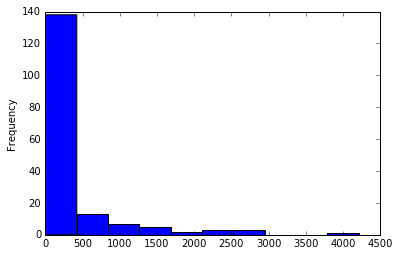

In [18]:
recent_grads['Sample_size'].plot(kind='hist')

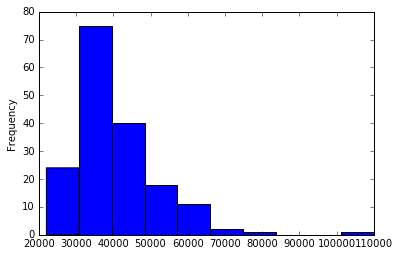

In [19]:
recent_grads['Median'].plot(kind='hist')

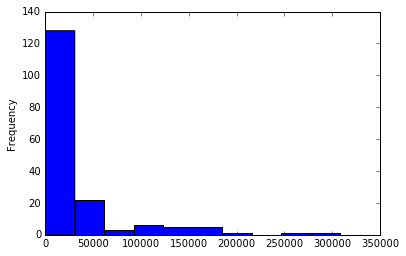

In [20]:
recent_grads['Employed'].plot(kind='hist')

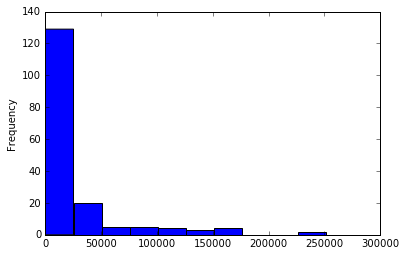

In [21]:
recent_grads['Full_time'].plot(kind='hist')

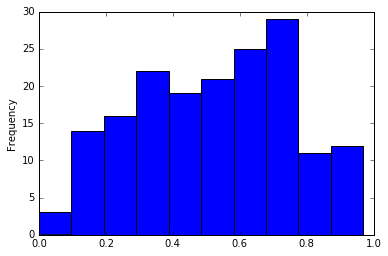

In [22]:
recent_grads['ShareWomen'].plot(kind='hist')

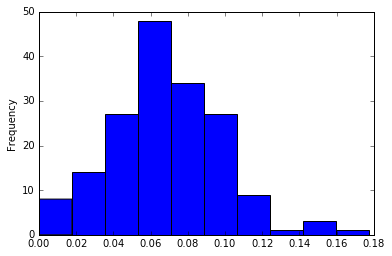

In [23]:
recent_grads['Unemployment_rate'].plot(kind='hist')

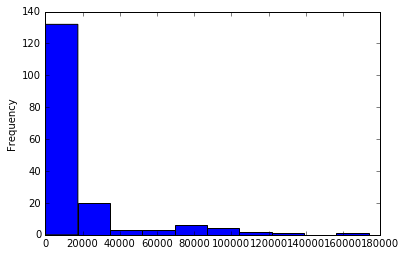

In [24]:
recent_grads['Men'].plot(kind='hist')

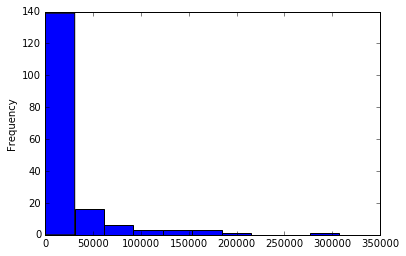

In [25]:
recent_grads['Women'].plot(kind='hist')

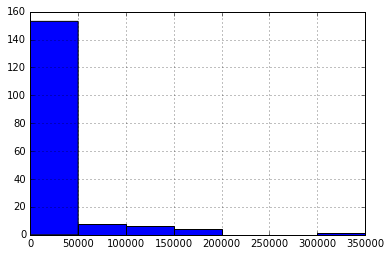

In [26]:
recent_grads['Women'].hist(bins=7, range=(0,350000))

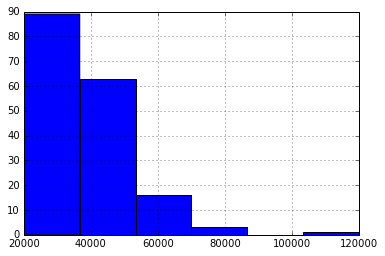

In [27]:
recent_grads['Median'].hist(bins=6, range=(20000,120000))

In [28]:
recent_grads['Median'].max()

110000

In [29]:
recent_grads['Median'].min()

22000

In [30]:
recent_grads['P75th'].max()

125000

### Pandas, Scatter Matrix Plot

In [31]:
from pandas.plotting import scatter_matrix

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c748fd5f8>,
      dtype=object)

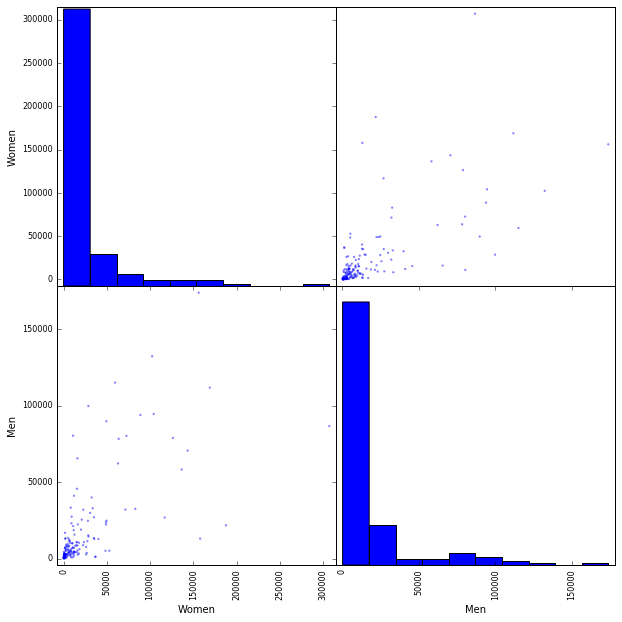

In [32]:
scatter_matrix(recent_grads[['Women', 'Men']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c7476c5c0>,
      dtype=object)

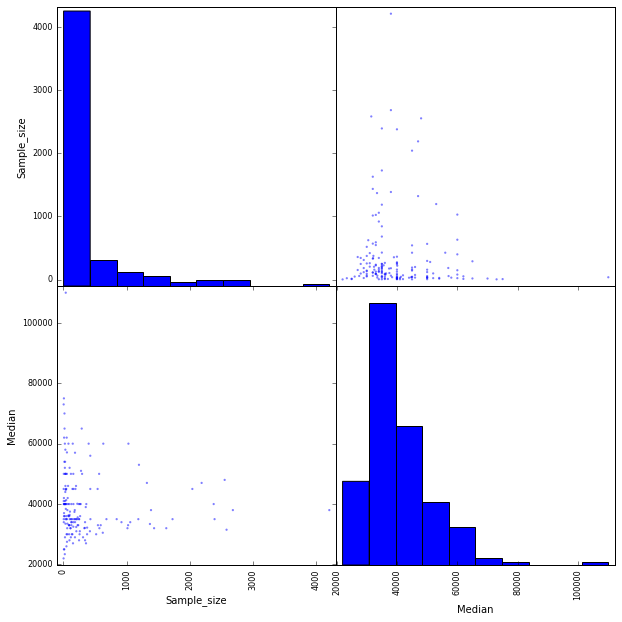

In [33]:
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4c74583e80>,
      dtype=object)

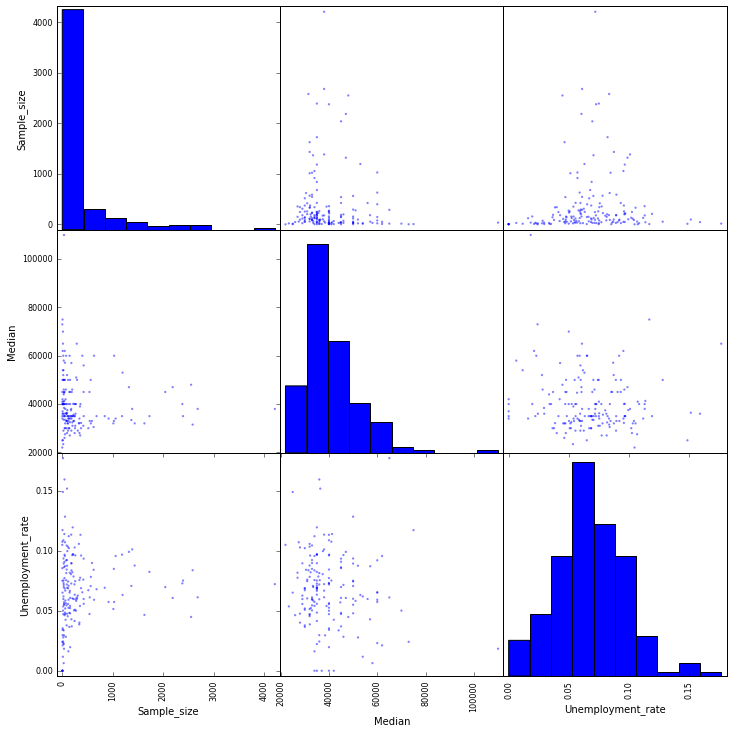

In [34]:
scatter_matrix(recent_grads[['Sample_size', 'Median', 'Unemployment_rate']], figsize=(12,12))

### Pandas, Bar Plots

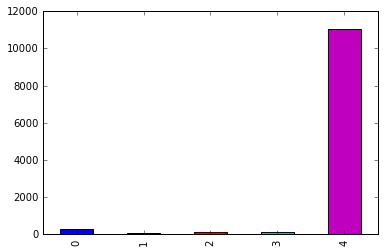

In [35]:
recent_grads[:5]['Women'].plot(kind='bar')

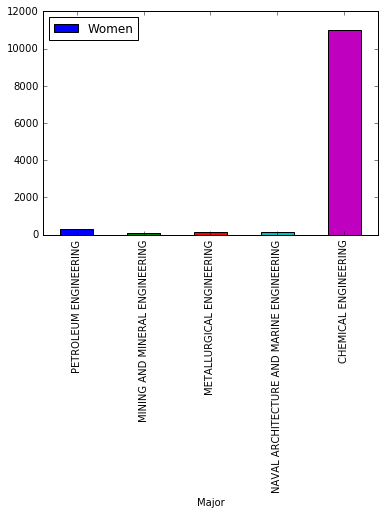

In [36]:
recent_grads[:5].plot.bar(x='Major', y='Women')

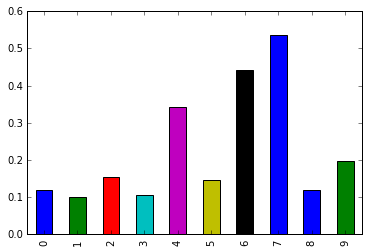

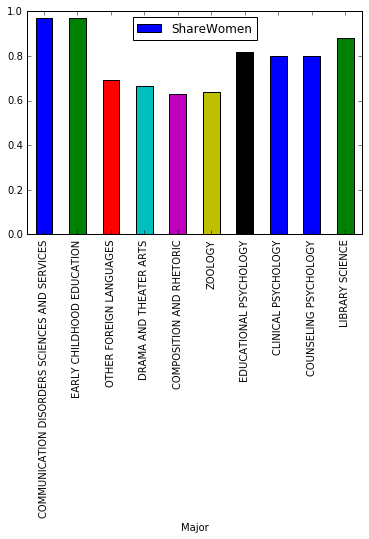

In [37]:
recent_grads[:10]['ShareWomen'].plot(kind='bar')
recent_grads[-10:].plot.bar(x='Major', y = 'ShareWomen')

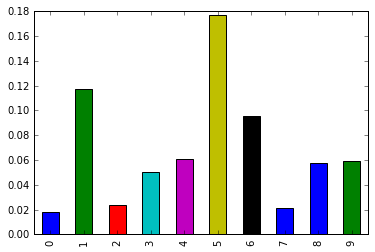

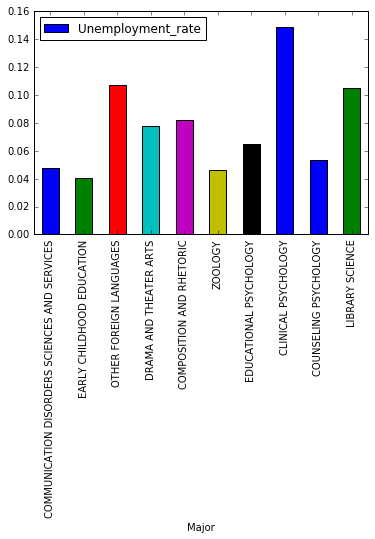

In [38]:
recent_grads[:10]['Unemployment_rate'].plot(kind='bar')
recent_grads[-10:].plot.bar(x='Major', y = 'Unemployment_rate')